In [28]:
import csv
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
# Importamos utilidades y modelos de sklearn
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold


# Se levanta el split hecho en el NoteBook anterior

In [29]:
X_train = pd.read_csv("X_train")
X_train.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,anio_publ
0,0.0,3.0,2.0,3.0,196.0,160.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2014
1,20.0,4.0,2.0,2.0,245.0,196.0,104734.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,2012
2,5.0,3.0,1.0,2.0,108.0,120.0,58952.0,NaN,NaN,0.0,0.0,0.0,1.0,1.0,2015
3,10.0,3.0,1.0,3.0,200.0,147.0,49066.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2016
4,NaN,NaN,0.0,NaN,NaN,250.0,24892.0,19.23339,-99.166991,0.0,0.0,0.0,0.0,0.0,2016


In [30]:
X_test = pd.read_csv("X_test")

In [31]:
y_train = pd.read_csv("y_train")

In [32]:
y_test = pd.read_csv("y_test")

# Se levantan todos los XGBoost guardados

In [33]:
xgb_created = []

## Atencion! n tiene que coincidir con la cantidad guardada!

In [34]:
n = 10

In [35]:
for i in range(n):
    current_xgb = xgb.XGBRegressor()
    current_xgb.load_model("xgb_{}".format(i))
    xgb_created.append(current_xgb)

# Se arma el DF de precios para entrenar el RF

In [36]:
RF_train = pd.DataFrame(index = X_train.index.copy())

In [37]:
for i in range(n):
    current_price_pred = xgb_created[i].predict(X_train)
    RF_train['pred_{}'.format(i)] = current_price_pred
RF_train.head()

,pred_0,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9
0,1675568.750,2215047.250,2228394.000,1898943.625,1.922905e+06,1287235.750,1860694.000,2323569.750,2163748.250,1943703.500
1,1133347.250,2150456.000,2499955.000,1865205.625,2.163361e+06,1703291.500,1709310.000,2634906.250,1544825.750,2030618.750
2,1297917.750,1093787.875,1133797.500,1215002.500,9.620698e+05,1360640.625,1284997.500,1237130.500,1305967.125,1028484.125
3,1428815.125,1736197.000,1948891.625,1995871.625,2.000884e+06,1635182.875,1841221.125,1602573.500,1625622.750,1801433.500
4,2332554.250,2606682.500,1933341.875,1984284.125,3.188365e+06,3289110.750,1956545.250,1522905.875,2769067.500,1646197.000


In [38]:
len(RF_train)

168000

In [39]:
len(y_train)

168000

## Exporto el RF_train para poder buscar hiperparametros

In [ ]:
RF_train.to_csv("RF_train", index = False)

# Entreno el randomForest con RF_train

In [55]:
model_RF = RandomForestRegressor(n_estimators = 400, max_depth = 9, min_samples_split = 2 ,max_features = "auto", n_jobs= -1, random_state = 0)
model_RF.fit(RF_train, y_train.values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

# Testeo el modelo final

## Armo el DF para X_test

In [56]:
RF_test = pd.DataFrame(index = X_test.index.copy())


In [57]:
for i in range(n):
    current_price_pred = xgb_created[i].predict(X_test)
    RF_test['pred_{}'.format(i)] = current_price_pred
RF_test.head()

,pred_0,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9
0,1.474296e+06,1429073.625,2.102880e+06,5.172299e+05,1.012201e+06,1056828.250,1.203289e+06,1.334011e+06,1.344651e+06,1.161910e+06
1,2.410666e+06,2062718.375,1.288292e+06,1.990186e+06,3.375315e+06,2544960.500,1.989957e+06,3.297608e+06,2.779025e+06,2.610663e+06
2,3.549766e+06,2887129.250,2.991109e+06,1.922343e+06,1.640191e+06,1679933.500,2.316988e+06,2.522919e+06,4.425657e+05,1.763238e+06
3,1.344572e+06,1705894.875,1.484216e+06,9.204700e+05,8.596188e+05,3497846.500,1.337596e+06,6.992229e+05,1.569691e+06,1.479601e+06
4,5.627536e+05,745208.750,1.294672e+05,2.832455e+05,9.457744e+05,275529.625,-3.360757e+04,5.598388e+05,1.523258e+05,2.651242e+05


## Se hacen las dos predicciones necesarias

In [58]:
pred_train = model_RF.predict(RF_train)
pred_test = model_RF.predict(RF_test)

### Metrica de Mean Absolute Error (La de Kaggle) ?? (Hay que preguntar)

In [59]:
mae_train = np.sqrt(sklearn.metrics.mean_absolute_error(y_train, pred_train))
mae_test = np.sqrt(sklearn.metrics.mean_absolute_error(y_test, pred_test))
#print(f"MAE train: {mea_train:.5f}")
#print(f"MAE test: {mea_test:.5f}")
print("MAE train: "+str(mae_train))
print("MAE test: "+str(mae_test))

MAE train: 739.3291499349763
MAE test: 793.4329301917516


In [60]:
model_RF.feature_importances_

array([0.0491166 , 0.2909627 , 0.01369694, 0.02182263, 0.04710331,
       0.01628581, 0.16880489, 0.13493304, 0.14695691, 0.11031717])

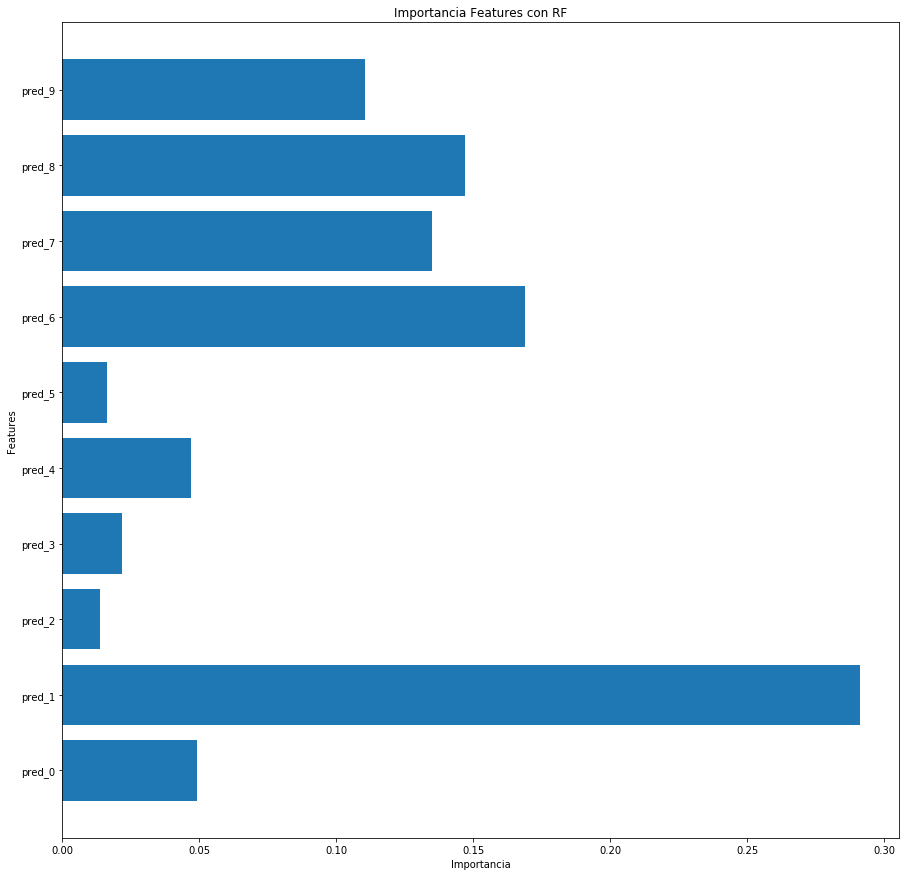

In [61]:
plt.figure(figsize = (15,15))
plt.barh(RF_train.columns, model_RF.feature_importances_)
plt.xlabel('Importancia')
plt.ylabel('Features')
plt.title('Importancia Features con RF')
plt.show()

# Se genera el archivo para subir a Kaggle

In [62]:
test_set = pd.read_csv("test_set_xgb.csv")

In [63]:
test_set.columns

Index(['id', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'gimnasio',
       'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'anio_publ'],
      dtype='object')

In [64]:
X_test_set = test_set.loc[:, test_set.columns != 'id']

## Armo el DF con las predicciones de test

In [65]:
RF_test_set = pd.DataFrame(index = test_set.index.copy())

In [66]:
for i in range(n):
    current_price_pred = xgb_created[i].predict(X_test_set)
    RF_test_set['pred_{}'.format(i)] = current_price_pred
RF_test_set.head()

,pred_0,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9
0,6.088174e+06,6949777.000,4.775290e+06,5.014534e+06,5.886592e+06,4.283812e+06,5.806916e+06,6362108.00,6.824782e+06,5647659.50
1,1.054836e+06,1573377.125,2.212509e+06,1.164677e+06,6.606324e+05,9.489998e+05,1.210768e+06,1619574.25,1.686790e+06,1165905.75
2,2.016575e+06,2513684.750,2.008553e+06,2.716706e+06,1.847128e+06,1.913529e+06,2.705785e+06,2904731.50,1.915329e+06,2654951.00
3,1.311960e+06,1323843.625,1.984210e+06,1.910163e+06,1.597150e+06,1.124694e+06,-3.102401e+05,1783756.75,2.179310e+06,1807548.00
4,1.039284e+06,543385.875,4.699513e+05,8.023003e+05,8.828051e+05,1.141039e+06,7.137798e+05,745406.00,5.149207e+05,892869.25


In [67]:
pred_a_kaggle = model_RF.predict(RF_test_set)

In [68]:
df_a_kaggle = pd.DataFrame()
df_a_kaggle['id'] = test_set['id']
df_a_kaggle['target'] = pred_a_kaggle
df_a_kaggle.head()

,id,target
0,4941,5.891456e+06
1,51775,1.373225e+06
2,115253,2.237164e+06
3,299321,1.559321e+06
4,173570,8.026182e+05


In [69]:
df_a_kaggle.to_csv("subir_a_kaggle", header = True, index = False)